# KNN(K Mearest Neighbour)

In [33]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 : Data ingestion

In [34]:
import pandas as pd
df= pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Step 2 : Basic data quality checks

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [36]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(0)

### Step 3 : saperate X and Y(Drug)

In [38]:
X = df.drop(columns=["Drug"])
Y = df[["Drug"]]

In [39]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [40]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [41]:
Y.value_counts()

Drug 
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

### Step 4 : Apply feature engineering on X

In [42]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [43]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [44]:
cat

['Sex', 'BP', 'Cholesterol']

In [45]:
con

['Age', 'Na_to_K']

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [47]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [48]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [49]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [50]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,0.0,0.0,0.0,0.0
1,0.162699,-0.415145,1.0,1.0,0.0,0.0
2,0.162699,-0.828558,1.0,1.0,0.0,0.0
3,-0.988614,-1.149963,0.0,0.0,1.0,0.0
4,1.011034,0.271794,0.0,1.0,0.0,0.0


### Step 5 : Apply train_test_split

In [51]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.4, random_state=21)

In [52]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
164,-1.715759,0.405574,1.0,0.0,0.0,1.0
68,0.586866,1.189795,1.0,0.0,1.0,0.0
97,0.708057,1.292073,0.0,0.0,0.0,0.0
10,0.162699,-0.599162,0.0,1.0,0.0,0.0
189,1.192821,0.672717,1.0,0.0,0.0,1.0


In [53]:
ytrain.head()

,Drug
164,DrugY
68,DrugY
97,DrugY
10,drugC
189,DrugY


In [54]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
144,-0.322065,-0.891007,1.0,0.0,0.0,0.0
9,-0.079683,0.455672,1.0,1.0,0.0,1.0
17,-0.079683,-0.293162,1.0,0.0,0.0,0.0
20,0.768653,0.422366,1.0,1.0,0.0,1.0
45,1.314011,-1.107081,0.0,0.0,1.0,1.0


In [55]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


In [56]:
xtrain.shape

(120, 6)

In [57]:
xtest.shape

(80, 6)

### Step 6 : Build Model
#### 1. KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(
    n_neighbors=27
)

model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=27)

In [59]:
model.score(xtrain, ytrain)

0.7916666666666666

In [60]:
model.score(xtest, ytest)

0.75

* Hyperparameter tuning

In [61]:
import numpy as np
params = {"n_neighbors" : np.arange(6,50, 2)}
params

{'n_neighbors': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38,
        40, 42, 44, 46, 48])}

In [62]:
from sklearn.model_selection import RandomizedSearchCV

model_knn = KNeighborsClassifier()

rscv_knn = RandomizedSearchCV(model_knn, param_distributions=params, cv=5, scoring="f1_macro", n_jobs=-1)
rscv_knn.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38,
       40, 42, 44, 46, 48])},
                   scoring='f1_macro')

In [63]:
rscv_knn.best_params_

{'n_neighbors': np.int64(8)}

In [64]:
rscv_knn.best_score_

np.float64(0.8295562987736901)

In [65]:
best_knn = rscv_knn.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=np.int64(8))

### Step 7 : Model Evaluation

In [68]:
ypred_train = best_knn.predict(xtrain)
ypred_train[0:5]

array(['DrugY', 'DrugY', 'DrugY', 'drugC', 'DrugY'], dtype=object)

In [69]:
ytrain.head()

,Drug
164,DrugY
68,DrugY
97,DrugY
10,drugC
189,DrugY


In [67]:
ypred_test = best_knn.predict(xtest)

In [70]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


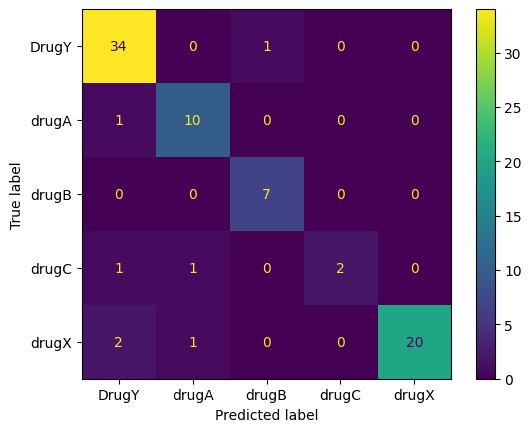

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)

In [73]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       0.89      0.97      0.93        35
       drugA       0.83      0.91      0.87        11
       drugB       0.88      1.00      0.93         7
       drugC       1.00      0.50      0.67         4
       drugX       1.00      0.87      0.93        23

    accuracy                           0.91        80
   macro avg       0.92      0.85      0.87        80
weighted avg       0.92      0.91      0.91        80



#### SVM

In [77]:
from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(xtrain, ytrain)

SVC(probability=True)

In [78]:
model_svc.score(xtrain, ytrain)

0.9916666666666667

In [79]:
model_svc.score(xtest, ytest)

0.925

In [83]:
ytest_pred = model_svc.predict(xtest)
ytest_pred[0:5]

array(['drugA', 'DrugY', 'drugA', 'DrugY', 'drugX'], dtype=object)

In [84]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


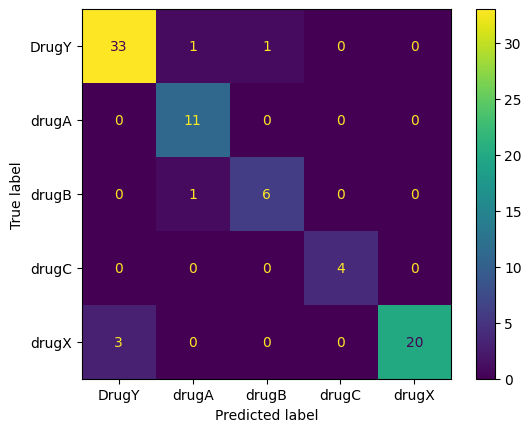

In [85]:
ConfusionMatrixDisplay.from_estimator(model_svc, xtest, ytest)

In [86]:
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

       DrugY       0.92      0.94      0.93        35
       drugA       0.85      1.00      0.92        11
       drugB       0.86      0.86      0.86         7
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.87      0.93        23

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.93        80
weighted avg       0.93      0.93      0.93        80



### Out of sample predictions

In [88]:
xnew = pd.read_csv("drugtest.csv")
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,37.0,F,HIGH,HIGH,13.091
1,NaN,F,HIGH,HIGH,12.894
2,23.0,M,NaN,HIGH,31.686
3,31.0,M,HIGH,HIGH,30.366
4,39.0,M,HIGH,HIGH,9.664


In [89]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [90]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-0.443255,-0.415423,0.0,0.0,0.0,0.0
1,0.041508,-0.442762,0.0,0.0,0.0,0.0
2,-1.291591,2.165111,1.0,0.0,0.0,0.0
3,-0.806828,1.981927,1.0,0.0,0.0,0.0
4,-0.322065,-0.891007,1.0,0.0,0.0,0.0


In [92]:
preds = model_svc.predict(xnew_pre)
preds[0:5]

array(['drugA', 'drugA', 'DrugY', 'DrugY', 'drugA'], dtype=object)

In [95]:
model_svc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [96]:
probs = model_svc.predict_proba(xnew_pre)
probs[0:5]

array([[0.04360655, 0.86920255, 0.02820981, 0.03710009, 0.021881  ],
       [0.08752085, 0.6739874 , 0.13991086, 0.06101366, 0.03756723],
       [0.96882719, 0.00439813, 0.00870499, 0.00806134, 0.01000834],
       [0.98473598, 0.00239008, 0.00500178, 0.00409942, 0.00377275],
       [0.008103  , 0.93456531, 0.0162991 , 0.02945213, 0.01158046]])

In [97]:
xnew["Drug"] = preds
xnew[model_svc.classes_] = probs

In [98]:
xnew = xnew.round(4)

In [99]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,DrugY,drugA,drugB,drugC,drugX
0,37.0,F,HIGH,HIGH,13.091,drugA,0.0436,0.8692,0.0282,0.0371,0.0219
1,NaN,F,HIGH,HIGH,12.894,drugA,0.0875,0.6740,0.1399,0.0610,0.0376
2,23.0,M,NaN,HIGH,31.686,DrugY,0.9688,0.0044,0.0087,0.0081,0.0100
3,31.0,M,HIGH,HIGH,30.366,DrugY,0.9847,0.0024,0.0050,0.0041,0.0038
4,39.0,M,HIGH,HIGH,9.664,drugA,0.0081,0.9346,0.0163,0.0295,0.0116
5,16.0,M,LOW,HIGH,12.006,drugC,0.1018,0.0436,0.0131,0.7892,0.0522
6,33.0,F,LOW,HIGH,NaN,drugC,0.2191,0.0679,0.0149,0.6307,0.0673
7,59.0,M,HIGH,HIGH,NaN,drugB,0.3079,0.1025,0.5238,0.0397,0.0260
8,68.0,M,LOW,HIGH,10.291,drugC,0.0499,0.0171,0.0633,0.7900,0.0798
9,30.0,F,NORMAL,HIGH,10.443,drugX,0.0173,0.0412,0.0069,0.0184,0.9163


In [100]:
xnew.to_csv("SVMResukts.csv", index=False)

In [101]:
import joblib
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [102]:
joblib.dump(model_svc, "SVM_model.joblib")

['SVM_model.joblib']

In [103]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [104]:
m = joblib.load("SVM_model.joblib")
m

SVC(probability=True)